# Notebook to investigate different consensus setups and algorithms

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Create network topology
K = 10
AC = np.zeros((K,K))
AC[0,-1] = 1
AC[-1,0] = 1
for i in range(K-1):
    AC[i,i+1] = 1
    AC[i+1,i] = 1

In [62]:
# Define a consensus scheme
def consensus_iteration(data, A, startind=1, avg_weight=1):
    # data: Array to be filled
    # A: Adjacency matrix
    Nis = np.sum(A, axis=0)
    
    # Start executing the protocol
    for i in range(startind, data.shape[-1]):
        
        # Modify things here to change protocol. 
        
        # Metropolis:
        # Copy past iteration positions to the new iteration
        data[:,:,i] = data[:,:,i-1]
        # Perform protocol for each agent
        for j in range(A.shape[0]):
            for k in range(A.shape[1]):
                data[j,:,i] += A[j,k] * avg_weight * (data[k,:,i-1] - data[j,:,i-1]) / max(Nis[j], Nis[k])

In [57]:
AC

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [61]:
iterind = 199
Xtraj[0,:,iterind], Xtraj[0,:,iterind]+0.5*(Xtraj[1,:,iterind]-Xtraj[0,:,iterind])+0.5*(Xtraj[-1,:,iterind]-Xtraj[0,:,iterind])

(array([0.70781714, 0.42497461]), array([0.67363786, 0.44495105]))

In [63]:
# Create initial data values
X0 = np.random.random((K,2))

# Create array to store trajectory data
M = 200
Xtraj = np.zeros((K, 2, 200))
Xtraj[:,:,0] = X0

# Run
consensus_iteration(Xtraj, AC, avg_weight=0.3)
t = np.arange(M)

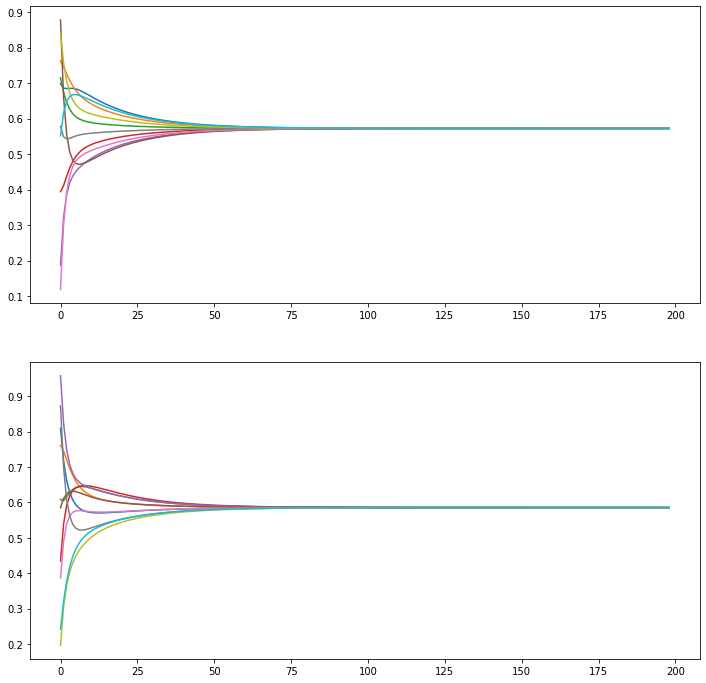

In [64]:
# Plot trajectories
tlim = -1
fig, (ax1,ax2) = plt.subplots(2, figsize=(12,12))
ax1.plot(t[:tlim], Xtraj[:,0,:tlim].T)
ax2.plot(t[:tlim], Xtraj[:,1,:tlim].T)

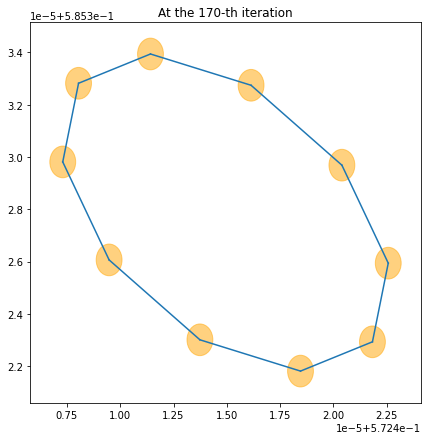

In [69]:
# Plot locations at certain iterations
iterind = 169
fig, axes = plt.subplots(figsize=(7,7)) 
xmax = max(Xtraj[:,0,iterind])
xmin = min(Xtraj[:,0,iterind])
xrange = xmax-xmin
ymax = max(Xtraj[:,1,iterind])
ymin = min(Xtraj[:,1,iterind])
yrange = ymax-ymin
axes.set_xlim(xmin-0.1*xrange, 0.1*xrange+xmax)
axes.set_ylim(ymin-0.1*yrange, 0.1*yrange+ymax)
radius = min(xrange, yrange)/20
c_list = []
l_list = []
for i in range(K):
    for j in range(i,K):
        if i == j:
            c_list.append( plt.Circle(Xtraj[i,:,iterind], radius, color='orange', alpha=0.5) )
            axes.add_artist(c_list[-1])
        elif AC[i,j] > 0:
            l_list.append( plt.Line2D(Xtraj[[i,j],0,iterind], Xtraj[[i,j],1,iterind]) )
            axes.add_artist(l_list[-1])
plt.title("At the {}-th iteration".format(iterind+1))
plt.show()

In [55]:
np.sum(AC, axis=0)

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])